## Multiple linear regression

Multiple linear regression is a linear model with multiple independent variables (predictors). This model is used to make a prediction Symptom 1. 

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('Predictions.xlsx') #This loads an object with many fields, including a description
df.head()

,UserNr,Studierichting,S1 goed,S1 fout,S2 goed,S2 fout,S3 goed,S3 fout,S4 goed,S4 fout
0,1,Exact en informatica,7,3,9,1,9,1,1,9
1,2,Recht en bestuur,7,3,10,0,5,5,8,2
2,3,Recht en bestuur,6,4,9,1,4,6,1,9
3,4,Exact en informatica,0,10,0,10,1,9,5,5
4,5,Taal en communicatie,2,8,8,2,5,5,2,8


In [3]:
df.drop(['S1 fout', 'S2 fout', 'S3 fout', 'S4 fout'], axis=1,inplace=True)
df.head()

,UserNr,Studierichting,S1 goed,S2 goed,S3 goed,S4 goed
0,1,Exact en informatica,7,9,9,1
1,2,Recht en bestuur,7,10,5,8
2,3,Recht en bestuur,6,9,4,1
3,4,Exact en informatica,0,0,1,5
4,5,Taal en communicatie,2,8,5,2


In [4]:
dummies = pd.get_dummies(df['Studierichting'])
df = pd.concat([df, dummies], axis=1) 
df.head()

,UserNr,Studierichting,S1 goed,S2 goed,S3 goed,S4 goed,Aarde en milieu,Economie en bedrijf,Exact en informatica,Gedrag en maatschappij,Gezondheid,Interdisciplinair,Kunst en cultuur,Onderwijs en opvoeding,Recht en bestuur,Taal en communicatie,Techniek
0,1,Exact en informatica,7,9,9,1,0,0,1,0,0,0,0,0,0,0,0
1,2,Recht en bestuur,7,10,5,8,0,0,0,0,0,0,0,0,1,0,0
2,3,Recht en bestuur,6,9,4,1,0,0,0,0,0,0,0,0,1,0,0
3,4,Exact en informatica,0,0,1,5,0,0,1,0,0,0,0,0,0,0,0
4,5,Taal en communicatie,2,8,5,2,0,0,0,0,0,0,0,0,0,1,0


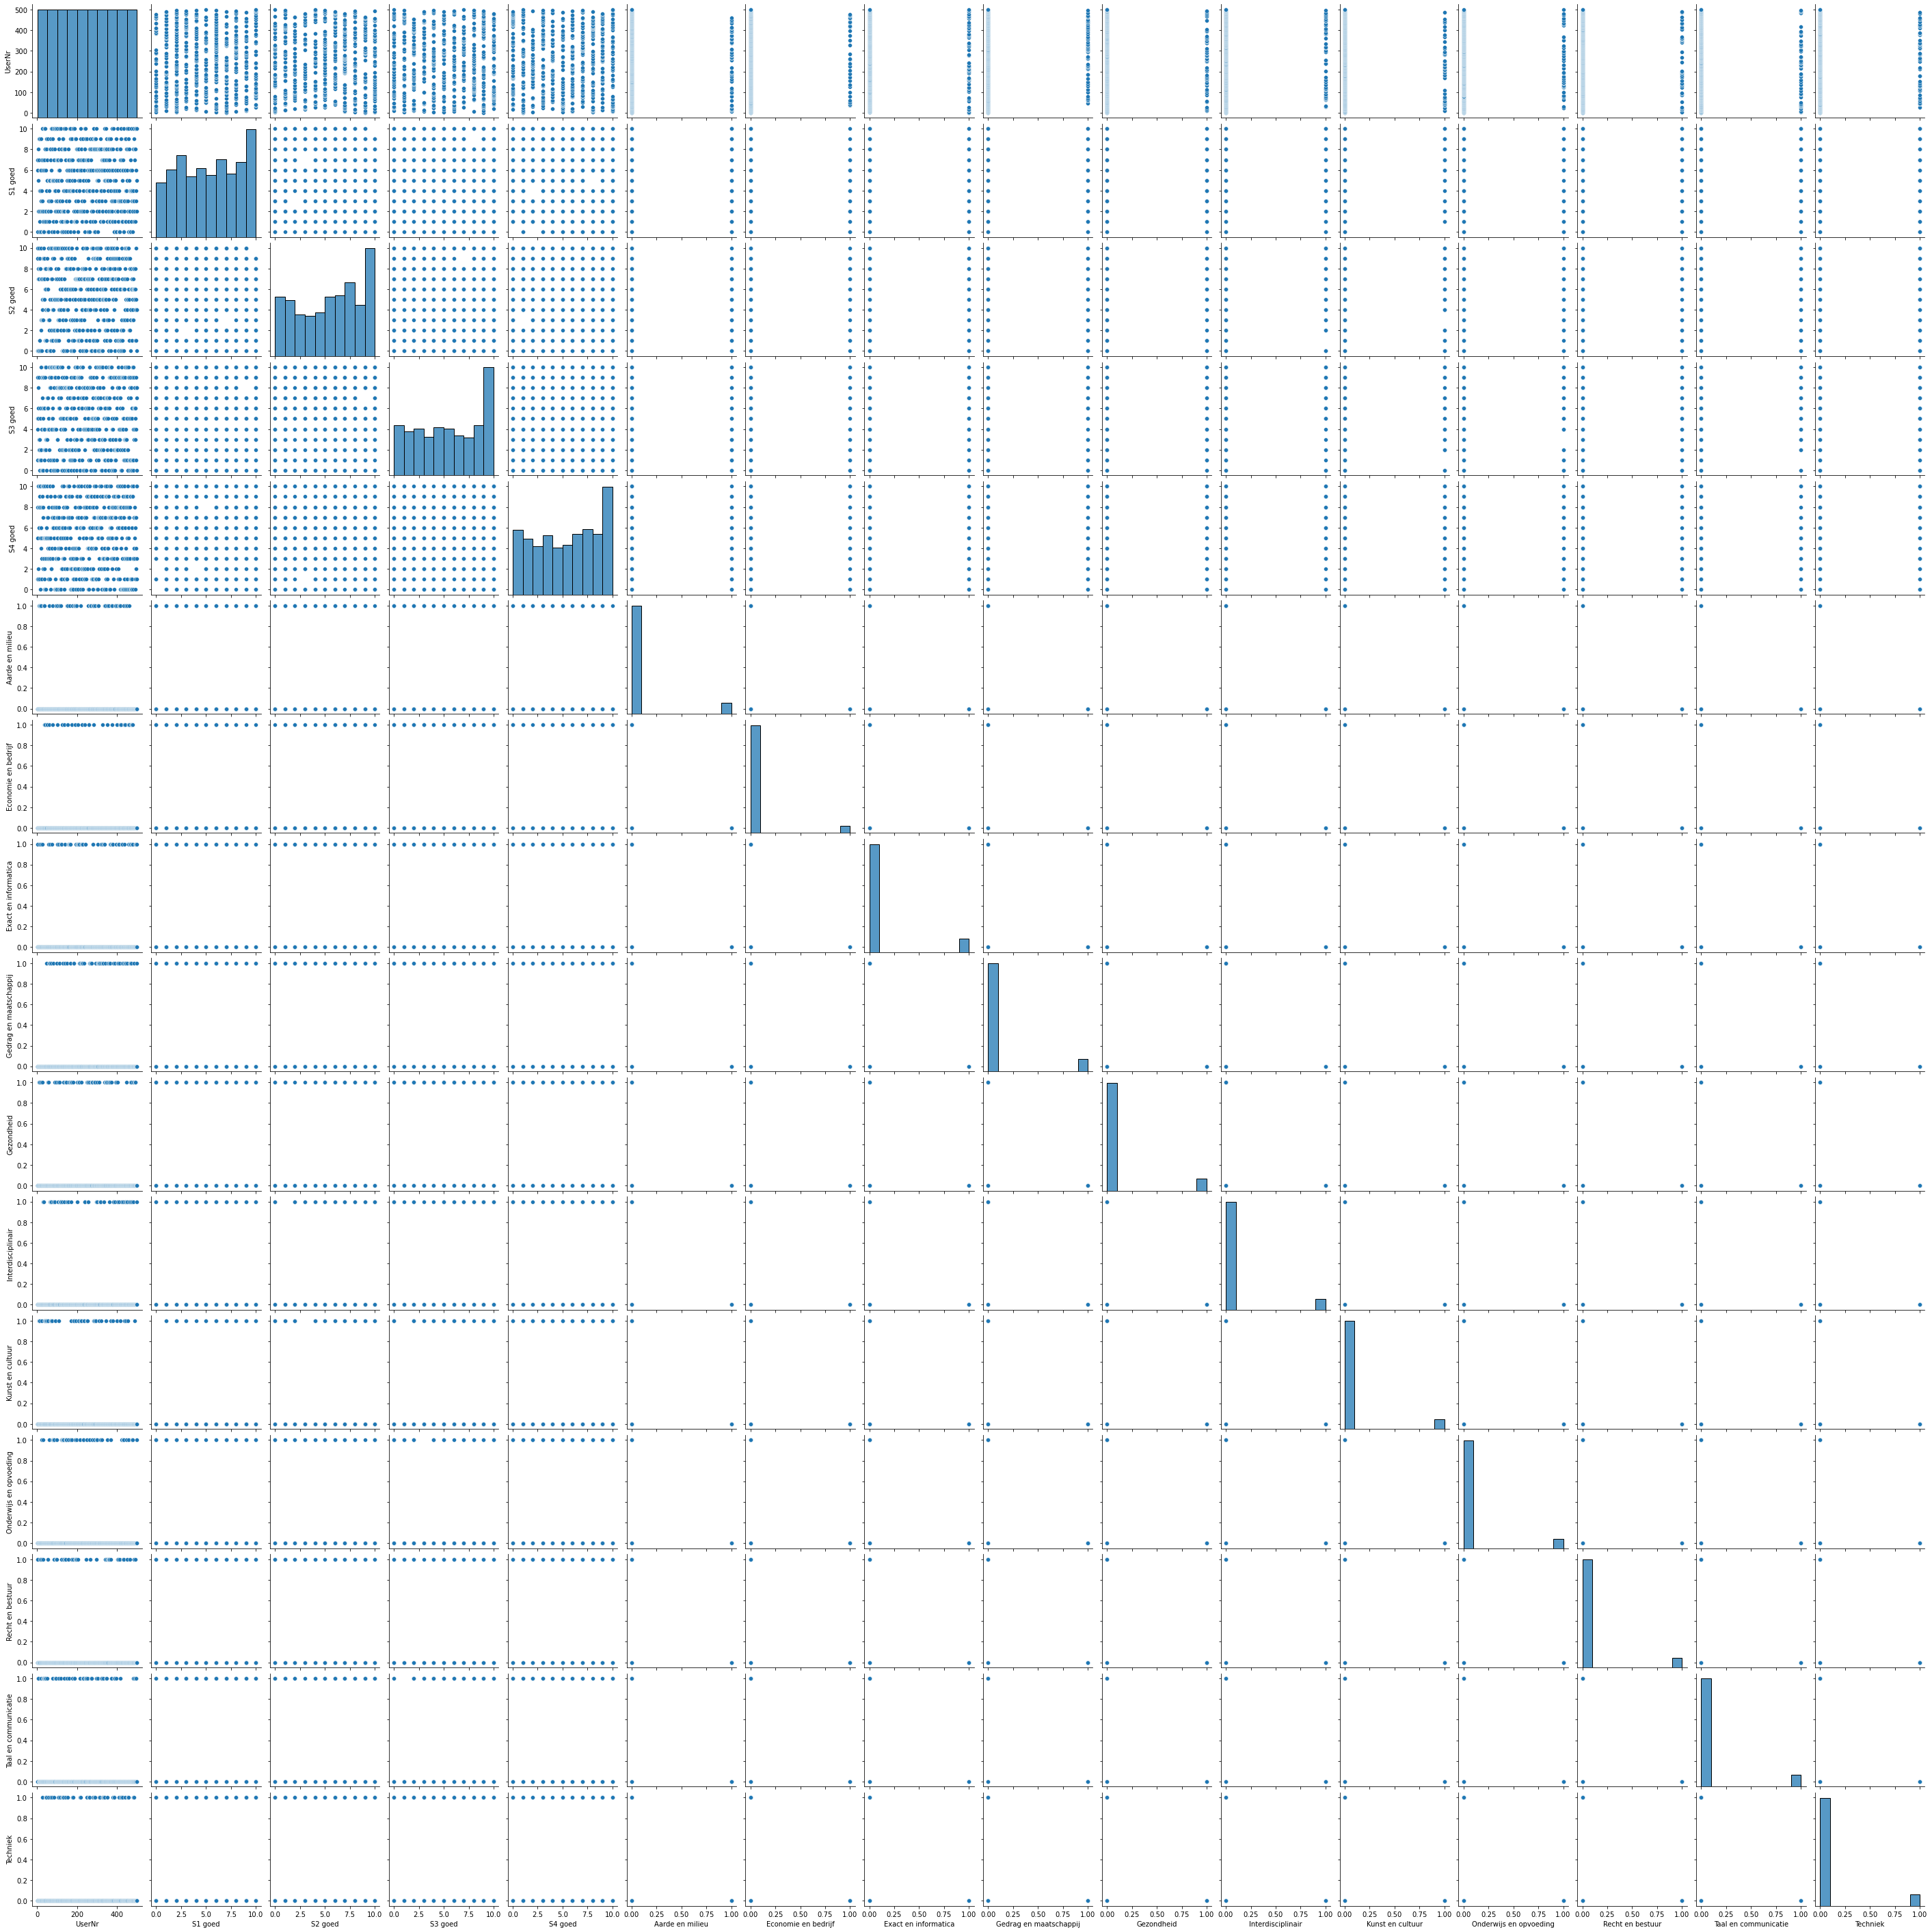

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.corr()

,UserNr,S1 goed,S2 goed,S3 goed,S4 goed,Aarde en milieu,Economie en bedrijf,Exact en informatica,Gedrag en maatschappij,Gezondheid,Interdisciplinair,Kunst en cultuur,Onderwijs en opvoeding,Recht en bestuur,Taal en communicatie,Techniek
UserNr,1.000000,-0.010557,0.034586,-0.010403,0.020983,-0.009876,0.023242,0.023848,0.087562,0.014582,0.022293,-0.074367,-0.027903,-0.025589,-0.067943,0.026528
S1 goed,-0.010557,1.000000,-0.056228,-0.015229,0.019934,-0.015731,-0.063111,-0.037957,-0.024876,0.003215,-0.017993,0.144469,-0.036689,0.015717,0.022672,0.009377
S2 goed,0.034586,-0.056228,1.000000,0.036198,-0.034724,-0.074824,0.043380,-0.001405,-0.089507,0.082702,0.064222,-0.042890,0.034926,0.010184,0.016745,-0.035640
S3 goed,-0.010403,-0.015229,0.036198,1.000000,0.063745,-0.138718,-0.024418,0.052207,-0.001857,0.020446,0.103321,0.007256,-0.033003,-0.017281,0.037228,-0.017847
S4 goed,0.020983,0.019934,-0.034724,0.063745,1.000000,0.004145,-0.026198,0.019847,0.003938,-0.008510,0.001973,0.022698,0.066179,0.016016,-0.096486,-0.000205
Aarde en milieu,-0.009876,-0.015731,-0.074824,-0.138718,0.004145,1.000000,-0.081836,-0.111906,-0.107279,-0.107279,-0.101322,-0.095134,-0.095134,-0.093865,-0.106104,-0.103730
Economie en bedrijf,0.023242,-0.063111,0.043380,-0.024418,-0.026198,-0.081836,1.000000,-0.090385,-0.086648,-0.086648,-0.081836,-0.076839,-0.076839,-0.075813,-0.085698,-0.083781
Exact en informatica,0.023848,-0.037957,-0.001405,0.052207,0.019847,-0.111906,-0.090385,1.000000,-0.118485,-0.118485,-0.111906,-0.105072,-0.105072,-0.103670,-0.117187,-0.114565
Gedrag en maatschappij,0.087562,-0.024876,-0.089507,-0.001857,0.003938,-0.107279,-0.086648,-0.118485,1.000000,-0.113586,-0.107279,-0.100727,-0.100727,-0.099383,-0.112342,-0.109828
Gezondheid,0.014582,0.003215,0.082702,0.020446,-0.008510,-0.107279,-0.086648,-0.118485,-0.113586,1.000000,-0.107279,-0.100727,-0.100727,-0.099383,-0.112342,-0.109828


In [7]:
y = df['S1 goed'] 
X = df.loc[:,'S2 goed':'Techniek'] 
X.index = df['UserNr'] 
X.head()

,S2 goed,S3 goed,S4 goed,Aarde en milieu,Economie en bedrijf,Exact en informatica,Gedrag en maatschappij,Gezondheid,Interdisciplinair,Kunst en cultuur,Onderwijs en opvoeding,Recht en bestuur,Taal en communicatie,Techniek
UserNr,,,,,,,,,,,,,,
1,9,9,1,0,0,1,0,0,0,0,0,0,0,0
2,10,5,8,0,0,0,0,0,0,0,0,1,0,0
3,9,4,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,5,0,0,1,0,0,0,0,0,0,0,0
5,8,5,2,0,0,0,0,0,0,0,0,0,1,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head()

,S2 goed,S3 goed,S4 goed,Aarde en milieu,Economie en bedrijf,Exact en informatica,Gedrag en maatschappij,Gezondheid,Interdisciplinair,Kunst en cultuur,Onderwijs en opvoeding,Recht en bestuur,Taal en communicatie,Techniek
UserNr,,,,,,,,,,,,,,
14,1,2,1,1,0,0,0,0,0,0,0,0,0,0
62,3,9,5,0,0,0,0,0,0,0,1,0,0,0
299,1,7,6,0,0,0,0,0,0,0,1,0,0,0
40,8,10,0,0,1,0,0,0,0,0,0,0,0,0
361,8,3,5,0,0,0,1,0,0,0,0,0,0,0


In [9]:
lm = LinearRegression() 
model = lm.fit(X_train, y_train) 

In [10]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
-0.065901,S2 goed
-0.000701,S3 goed
0.031923,S4 goed
-0.193390,Aarde en milieu
-0.272371,Economie en bedrijf
-0.196423,Exact en informatica
-0.642745,Gedrag en maatschappij
-0.036881,Gezondheid
-0.406876,Interdisciplinair
1.193323,Kunst en cultuur


In [11]:
y_test_p = lm.predict(X_test) 
r2_score(y_test, y_test_p)

7.508357630769957e-05

In [12]:
math.sqrt(mean_squared_error(y_test, y_test_p))

3.1619902874075065

/Users/sophiekieftenbelt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


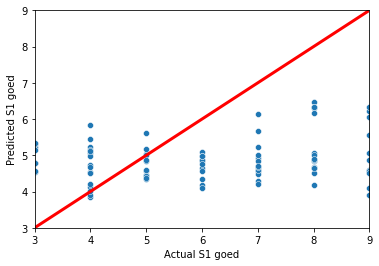

In [14]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual S1 goed')
plt.ylabel('Predicted S1 goed')
plt.xlim([3,9]) 
plt.ylim([3,9])
plt.plot([3, 9], [3, 9], color='red', lw=3) 
plt.show()